In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# cluster functions
empty = [0]
point = [1,2]
pair_1 = [3,4]
pair_2 = [5,6,7]
pair_3 = [8,9,10,11]
pair_4 = [12,13,14,15]
pair_5 = [16,17,18]
triplet_1 = [19,20]
triplet_2 = [21,22,23,24]

def select_cluster(clusters):
    global corr_train, corr_test
    if len(clusters) > 1:
        clus = []
        for i in clusters:
            clus = clus + i
    else:
        clus = clusters
    clus = np.array(clus)
    corr_train = df_corr_train.iloc[:,clus]
    corr_test = df_corr_test.iloc[:,clus]

def calc_eci(corr, x):
    return np.dot(np.linalg.pinv(corr), x)  

def pred(corr, eci):
    return np.dot(corr, eci)

def rms(x):
    return np.sqrt(np.dot(x,x)/len(x))

def main(title):
    eci = calc_eci(corr_train, energy_train)
    energy_pred_train = pred(corr_train, eci)
    energy_pred_test = pred(corr_test, eci)
    mae = np.mean(np.abs(energy_pred_test - energy_test))*1000
    rmse = rms(energy_pred_test - energy_test)*1000
    fig, ax = plt.subplots(1)
    ax.scatter(energy_train, energy_pred_train, label='training set')
    ax.scatter(energy_test, energy_pred_test, label='test set')
    ax.text(0.6,0.2, 'MAE  = {:5.1f} meV'.format(mae), transform=ax.transAxes)
    ax.text(0.6,0.1, 'RMSE = {:5.1f} meV'.format(rmse), transform=ax.transAxes)
    ax.set_title(title)
    ax.legend()

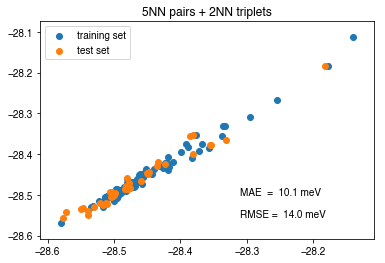

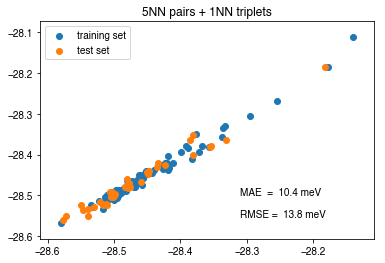

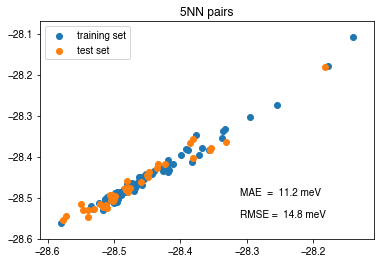

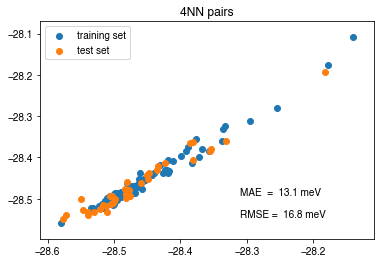

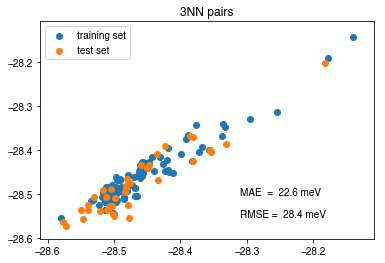

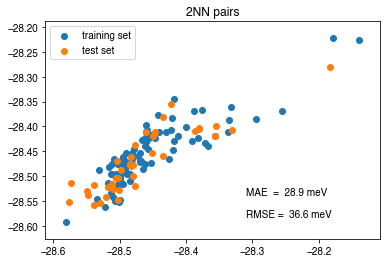

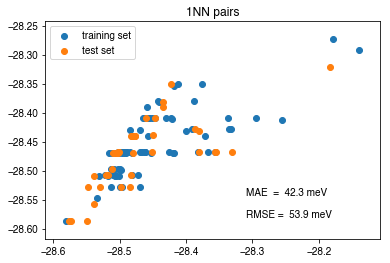

In [2]:
df = pd.read_csv('energy_corr.csv', delim_whitespace=True)
#training set (70% out of the total samples)
train = df.sample(frac=0.7)
df_corr_train = train.loc[:,"corr(0)":"corr(24)"]
energy_train = train.formation_energy
#test set
test = df.drop(train.index)
df_corr_test = test.loc[:,"corr(0)":"corr(24)"]
energy_test = test.formation_energy

#
select_cluster([empty, pair_1, pair_2, pair_3, pair_4, pair_5, triplet_1, triplet_2])
main('5NN pairs + 2NN triplets')

select_cluster([empty, pair_1, pair_2, pair_3, pair_4, pair_5, triplet_1])
main('5NN pairs + 1NN triplets')

select_cluster([empty, pair_1, pair_2, pair_3, pair_4, pair_5])
main('5NN pairs')

select_cluster([empty, pair_1, pair_2, pair_3, pair_4])
main('4NN pairs')

select_cluster([empty, pair_1, pair_2, pair_3])
main('3NN pairs')

select_cluster([empty, pair_1, pair_2])
main('2NN pairs')

select_cluster([empty, pair_1])
main('1NN pairs')